# Principal Component Analysis Assignment

In [64]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [65]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv')

### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [66]:
dt = pd.concat([data.select_dtypes(include='number'), data.pitchType], axis=1)
dt = dt.dropna()
dt = dt.drop(['batterId', 'pitcherId', 'catcherId', 'umpireId'], axis = 1)
dt.shape

(13438, 16)

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [76]:
pca = PCA(n_components=2)
X = dt.drop('pitchType', axis=1)
y = dt.pitchType
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_pca = pca.fit_transform(X_scaled)
pca1 = X_scaled_pca[:, 0]
pca2 = X_scaled_pca[:, 1]

### Compute the explained variance for new data set.

In [77]:
pca.explained_variance_

array([2.3876596 , 1.62387854])

### Generate a scatter plot that visualizes how the component values are distributed.

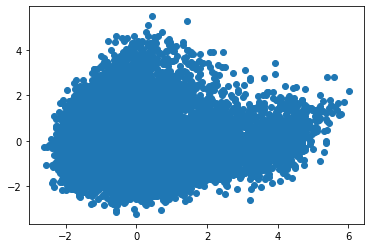

In [78]:
plt.scatter(pca1, pca2)

### Create a line plot that shows the explained variance by number of components.

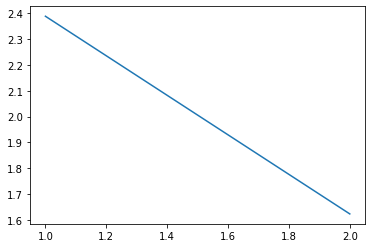

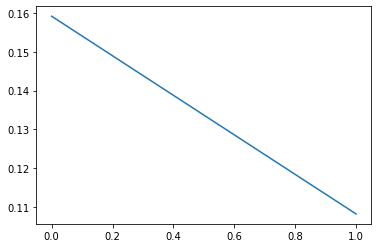

In [82]:
plt.plot([1, 2], pca.explained_variance_)
plt.show()
plt.plot(pca.explained_variance_ratio_)

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [83]:
model = RandomForestClassifier(max_depth=4, random_state=1)

In [91]:

from sklearn.metrics import f1_score

components = []

test_scores = []
train_scores = []

for i in range(2, 15):
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
  components.append(i)
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)

  model.fit(X_train_pca, y_train)
  y_pred_test = model.predict(X_test_pca)
  test_scores.append(f1_score(y_test, y_pred_test, average='micro'))
  
  y_pred_train = model.predict(X_train_pca)
  train_scores.append(f1_score(y_train, y_pred_train, average='micro'))
  


### Create a line plot that shows the training scores across the different numbers of principal components.

In [92]:
train_scores

[0.5528874776741417,
 0.5501091486406033,
 0.5650922802143282,
 0.5617185949593173,
 0.5603294304425481,
 0.5603294304425481,
 0.5655884103988886,
 0.5886088509624926,
 0.5825560627108554,
 0.5843421313752729,
 0.5542766421909109,
 0.5466362373486803,
 0.5594363961103394]

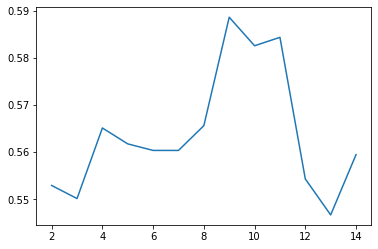

In [93]:
plt.plot(components, train_scores)

### Based on the analysis you conducted, what is the optimal number of principal components?

9

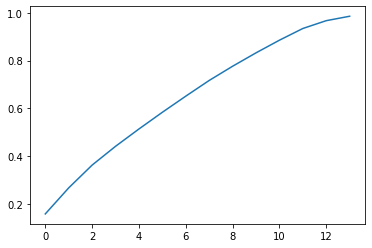

In [94]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))